In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [2]:
train = pd.read_csv("C:/Users/hp/SB/Reservation Cancellation Prediction/Data/train__dataset.csv")

In [3]:
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [4]:
train.shape

(18137, 18)

In [5]:
test = pd.read_csv("C:/Users/hp/SB/Reservation Cancellation Prediction/Data/test___dataset.csv")

In [6]:
test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,1,0,65,2018,3,28,1,0,0,0,96.3,0
1,2,0,0,2,0,0,0,322,2018,12,9,0,0,0,0,52.0,0
2,1,0,2,3,0,0,0,115,2018,2,27,0,0,0,0,75.0,0
3,2,0,2,0,2,0,0,386,2018,10,23,1,0,0,0,115.0,1
4,2,0,1,4,0,0,1,51,2018,8,31,1,0,0,0,123.3,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [8]:
train.isnull().any()

no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [9]:
train['booking_status'].value_counts()

0    12195
1     5942
Name: booking_status, dtype: int64

In [10]:
train.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,1.846777,0.107515,0.811104,2.208965,0.318465,0.031648,0.336770,85.377405,2017.820698,7.432762,15.660804,0.806197,0.025087,0.022440,0.151403,103.478868,0.617522,0.327618
std,0.516020,0.408901,0.873470,1.426365,0.629140,0.175066,0.772865,86.611736,0.383616,3.076999,8.772788,0.645972,0.156393,0.370078,1.714135,35.474103,0.787941,0.469357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.270000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [11]:
train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
for i in train.columns:
    print(i)
    print(train[i].value_counts())

no_of_adults
2    13104
1     3809
3     1150
0       67
4        7
Name: no_of_adults, dtype: int64
no_of_children
0    16767
1      814
2      544
3       10
9        2
Name: no_of_children, dtype: int64
no_of_weekend_nights
0    8444
1    4985
2    4535
3      84
4      56
5      19
6      13
7       1
Name: no_of_weekend_nights, dtype: int64
no_of_week_nights
2     5696
1     4727
3     3926
4     1505
0     1208
5      819
6       90
7       57
10      31
8       30
9       19
15       6
11       6
14       5
12       5
13       3
17       3
16       1
Name: no_of_week_nights, dtype: int64
type_of_meal_plan
0    13979
1     2543
2     1612
3        3
Name: type_of_meal_plan, dtype: int64
required_car_parking_space
0    17563
1      574
Name: required_car_parking_space, dtype: int64
room_type_reserved
0    14061
1     3031
3      498
2      344
4      123
5       77
6        3
Name: room_type_reserved, dtype: int64
lead_time
0      643
1      550
3      333
2      332
4      316
  

In [13]:
train['avg_price_per_room'].min(), train['avg_price_per_room'].max()

(0.0, 540.0)

In [14]:
train['no_of_previous_bookings_not_canceled'].min(), train['no_of_previous_bookings_not_canceled'].max()

(0, 58)

In [15]:
train['lead_time'].min(), train['lead_time'].max()

(0, 443)

Text(0.5, 1.0, 'Pie chart showing the distribution of Booking Status into number of Cancellation/Non Cancellation ')

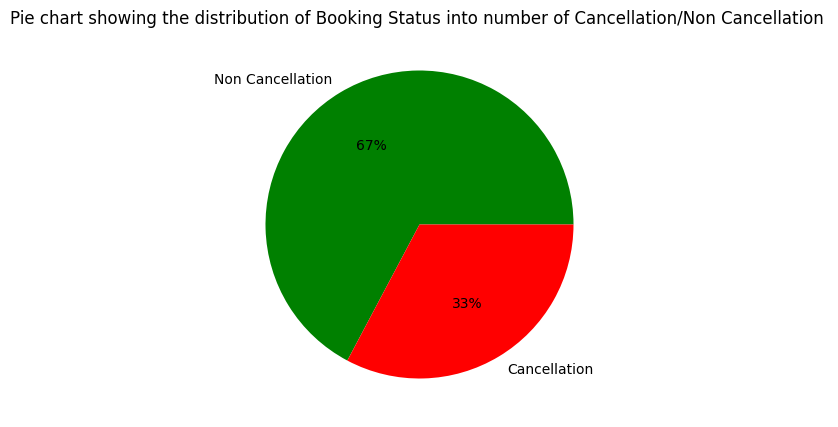

In [16]:
plt.figure(figsize = (5,5))

a = train['booking_status'].value_counts()
plt.pie(x = a, data = train, labels= ['Non Cancellation','Cancellation'], autopct='%.0f%%',colors = 'gr')
plt.title("Pie chart showing the distribution of Booking Status into number of Cancellation/Non Cancellation ")

array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'type_of_meal_plan'}>,
        <Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'room_type_reserved'}>,
        <Axes: title={'center': 'lead_time'}>],
       [<Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>,
        <Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'market_segment_type'}>],
       [<Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'avg_price_per_room'}>],
       [<Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_st

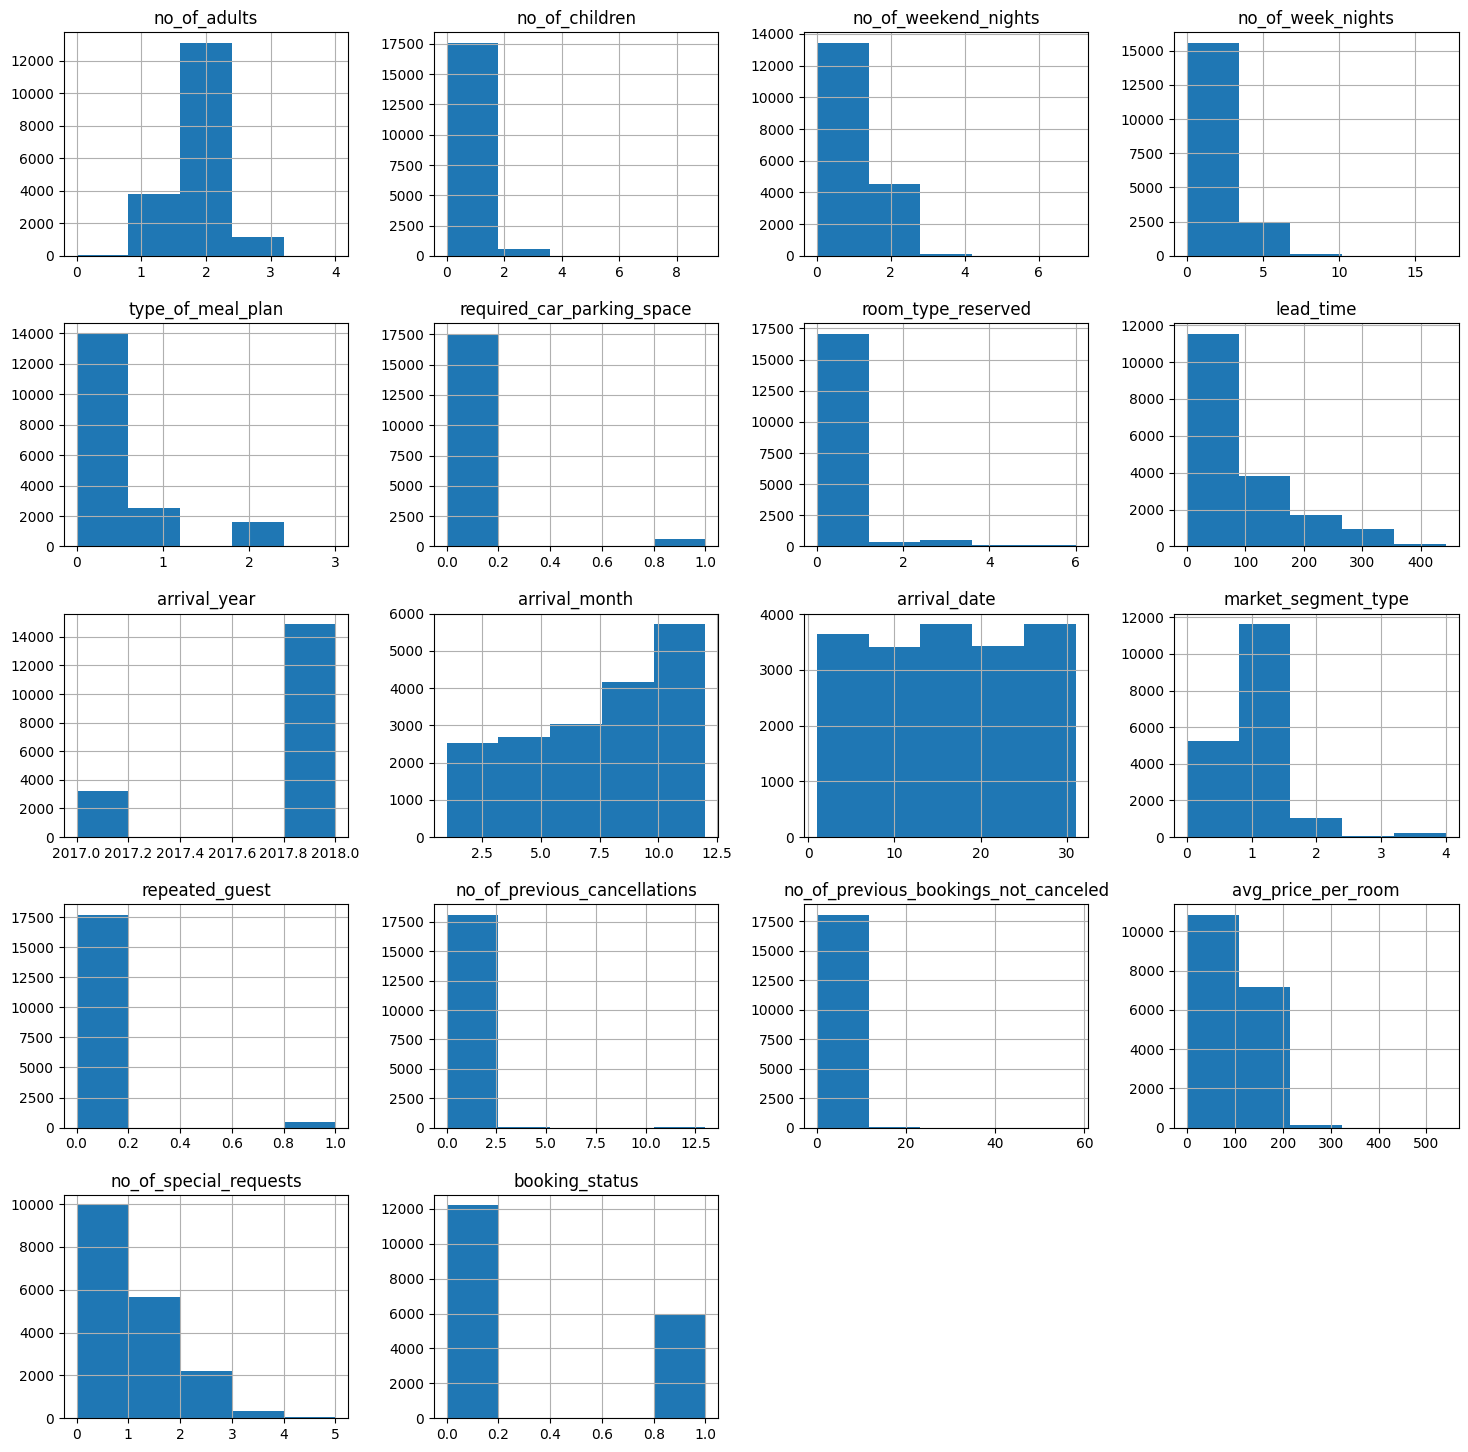

In [17]:
train.hist(bins=5, figsize=(18,18))

In [18]:
def countplot_of_2(x,hue,title=None,figsize=(6,5)):
    plt.figure(figsize=figsize)
    sns.countplot(data=train[[x,hue]],x=x,hue=hue)
    plt.title(title)
    plt.show()

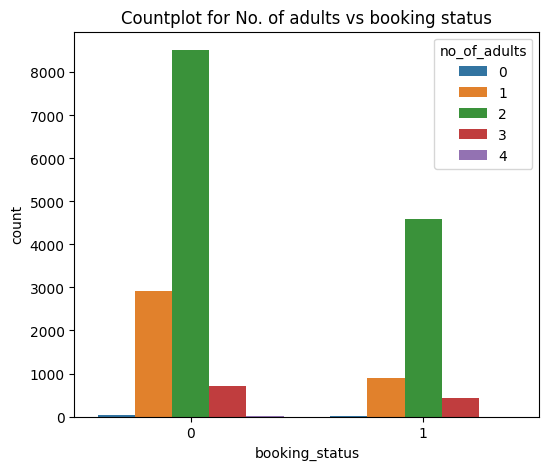

In [20]:
countplot_of_2('booking_status','no_of_adults', 'Countplot for No. of adults vs booking status')

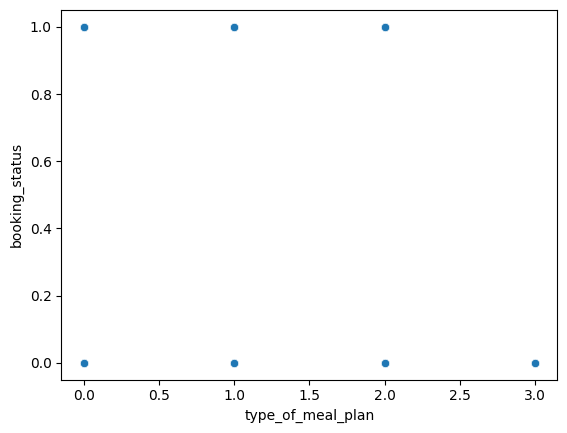

In [21]:
sns.scatterplot(data = train, x = "type_of_meal_plan", y = "booking_status")

plt.show()

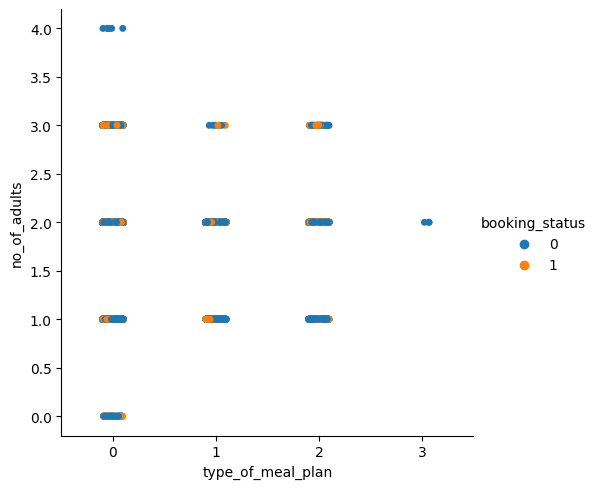

In [22]:
sns.catplot(data = train, x = "type_of_meal_plan", y = "no_of_adults", hue='booking_status')

plt.show()

In [23]:
corr = train.corr()
corr.style.background_gradient('coolwarm')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.017565,0.098241,0.103135,0.025139,0.010956,0.163542,0.098254,0.077915,0.018254,0.028433,-0.098518,-0.198334,-0.043494,-0.119703,0.292910,0.179970,0.094354
no_of_children,-0.017565,1.000000,0.026761,0.018957,-0.066445,0.026409,0.484223,-0.051646,0.044164,0.008244,0.020804,0.078264,-0.037868,-0.015580,-0.021495,0.342425,0.128325,0.035093
no_of_weekend_nights,0.098241,0.026761,1.000000,0.188796,-0.048357,-0.029054,0.044741,0.047559,0.054914,-0.010060,0.024026,-0.011626,-0.058549,-0.015543,-0.018829,-0.005837,0.057814,0.061117
no_of_week_nights,0.103135,0.018957,0.188796,1.000000,-0.076067,-0.054087,0.066756,0.148348,0.037240,0.044170,-0.007471,-0.060650,-0.094936,-0.024761,-0.041108,0.029326,0.037413,0.096472
type_of_meal_plan,0.025139,-0.066445,-0.048357,-0.076067,1.000000,-0.021426,-0.146645,0.134350,-0.083469,0.019607,0.019243,-0.156242,-0.068313,-0.018854,-0.042258,0.039359,-0.054258,0.076685
required_car_parking_space,0.010956,0.026409,-0.029054,-0.054087,-0.021426,1.000000,0.031255,-0.076608,0.006502,-0.018159,-0.008735,0.109336,0.116001,0.027336,0.062674,0.062199,0.083360,-0.092640
room_type_reserved,0.163542,0.484223,0.044741,0.066756,-0.146645,0.031255,1.000000,-0.088265,0.073680,0.003517,0.030617,0.165417,-0.006948,-0.001362,-0.001447,0.411577,0.121888,0.021723
lead_time,0.098254,-0.051646,0.047559,0.148348,0.134350,-0.076608,-0.088265,1.000000,0.148482,0.140062,0.012856,-0.312090,-0.135079,-0.042747,-0.078664,-0.069985,-0.103707,0.434314
arrival_year,0.077915,0.044164,0.054914,0.037240,-0.083469,0.006502,0.073680,0.148482,1.000000,-0.343696,0.008437,0.083831,-0.018765,0.006593,0.025689,0.184786,0.048557,0.183256
arrival_month,0.018254,0.008244,-0.010060,0.044170,0.019607,-0.018159,0.003517,0.140062,-0.343696,1.000000,-0.034861,-0.038777,-0.004458,-0.040632,-0.015225,0.053381,0.103389,-0.011472


In [24]:
X = train.drop('booking_status', axis = 1)
y = train['booking_status']

In [25]:
from imblearn import over_sampling

In [26]:
os = over_sampling.RandomOverSampler()

In [27]:
X, y = os.fit_resample(X,y)

In [28]:
y.value_counts()

0    12195
1    12195
Name: booking_status, dtype: int64

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [30]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_val, classifier.predict(X_val))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
    y_pred = classifier.predict(X_val)
    yt_pred = classifier.predict(X_train)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Validation Accuracy of the algorithm is ', accuracy_score(y_val, y_pred))
    return [(accuracy_score(y_train * 100, yt_pred * 100) * 100), (accuracy_score(y_val * 100, y_pred * 100) * 100), f1_score(y_val, y_pred)]

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

The Training Accuracy of the algorithm is  0.8671586715867159
The Validation Accuracy of the algorithm is  0.7984829848298483


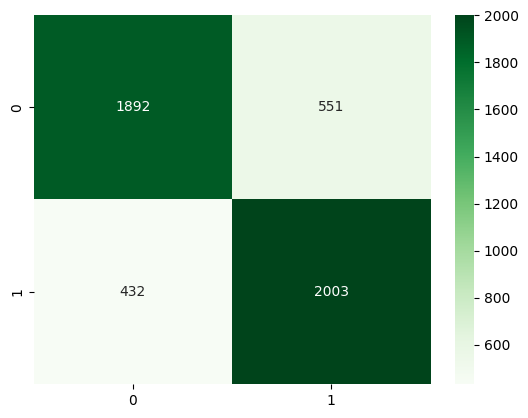

In [32]:
knn_r = model_evaluation(knn)

In [33]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

The Training Accuracy of the algorithm is  0.6929069290692907
The Validation Accuracy of the algorithm is  0.6927019270192702


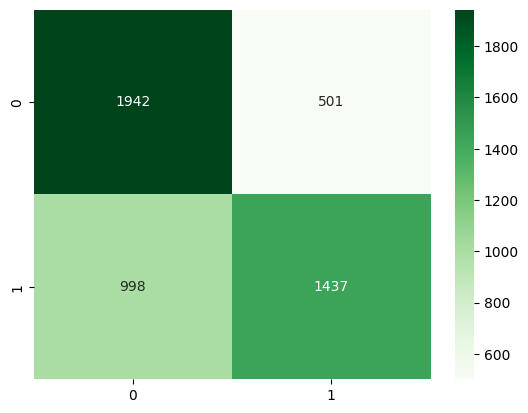

In [34]:
svm_r = model_evaluation(svm)

In [35]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

The Training Accuracy of the algorithm is  0.5427429274292743
The Validation Accuracy of the algorithm is  0.542640426404264


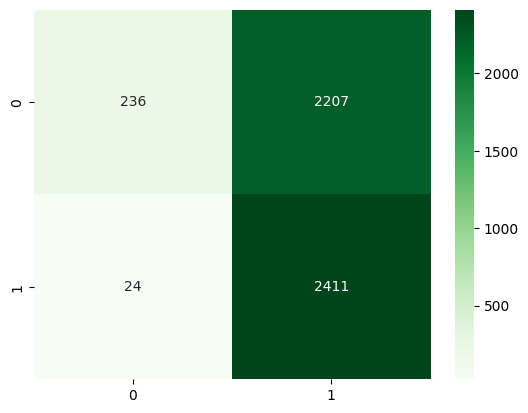

In [36]:
gnb_r = model_evaluation(gnb)

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

F:\Anacona\envs\yatin\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The Training Accuracy of the algorithm is  0.7657339073390734
The Validation Accuracy of the algorithm is  0.7603526035260353


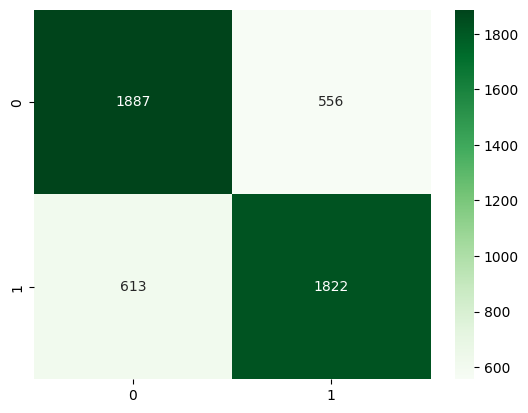

In [38]:
lr_r = model_evaluation(lr)

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

The Training Accuracy of the algorithm is  0.9957462074620747
The Validation Accuracy of the algorithm is  0.9149241492414925


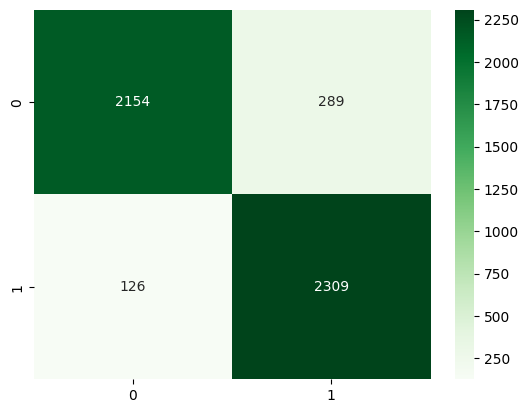

In [40]:
dt_r = model_evaluation(dt)

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

The Training Accuracy of the algorithm is  0.9957462074620747
The Validation Accuracy of the algorithm is  0.9366543665436654


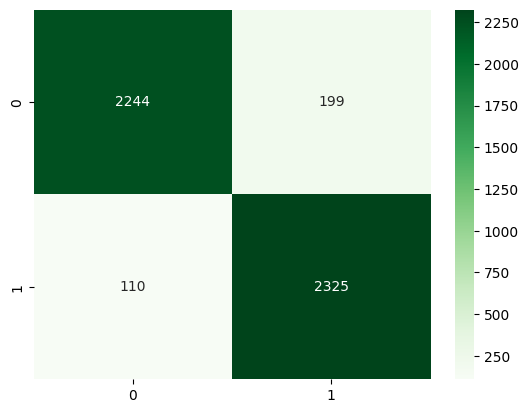

In [42]:
rf_r = model_evaluation(rf)

In [43]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

The Training Accuracy of the algorithm is  0.8293357933579336
The Validation Accuracy of the algorithm is  0.8275932759327593


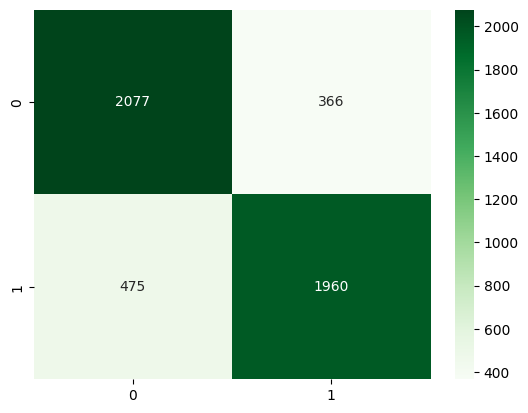

In [44]:
gb_r = model_evaluation(gb)

In [45]:
results = pd.DataFrame(data = [knn_r, svm_r, gnb_r, lr_r,dt_r, rf_r, gb_r],
                       columns = ['Training Accuracy', 'Validation Accuracy', 'F1 Score'],
                        index = ['K Nearest Neighbors', 'Support Vector Machines',
                                 'Naive Bayes', 'Logistic Regression',
                                 'Decision Tree', 'Random Forest', 'Gradient Boost'])

In [46]:
results

,Training Accuracy,Validation Accuracy,F1 Score
K Nearest Neighbors,86.715867,79.848298,0.802967
Support Vector Machines,69.290693,69.270193,0.657215
Naive Bayes,54.274293,54.264043,0.683681
Logistic Regression,76.573391,76.035260,0.757116
Decision Tree,99.574621,91.492415,0.917544
Random Forest,99.574621,93.665437,0.937689
Gradient Boost,82.933579,82.759328,0.823356


In [47]:
fi = rf.feature_importances_

In [48]:
col = train.columns

In [49]:
feat_imp = {}
for i, j in zip(fi,col):
    feat_imp[j] = i

In [50]:
feat_imp

{'no_of_adults': 0.02451589510890438,
 'no_of_children': 0.007860620740177576,
 'no_of_weekend_nights': 0.03853559411143688,
 'no_of_week_nights': 0.05185374686394164,
 'type_of_meal_plan': 0.0207749336794491,
 'required_car_parking_space': 0.008765835562143448,
 'room_type_reserved': 0.01617138934303456,
 'lead_time': 0.3095095259226672,
 'arrival_year': 0.029251040004139677,
 'arrival_month': 0.08517839262180074,
 'arrival_date': 0.08870916665908744,
 'market_segment_type': 0.0554798564141468,
 'repeated_guest': 0.0028544439844667892,
 'no_of_previous_cancellations': 0.0001926760710848964,
 'no_of_previous_bookings_not_canceled': 0.002942865603882197,
 'avg_price_per_room': 0.14955876581731695,
 'no_of_special_requests': 0.10784525149231991}

In [51]:
def model_evaluation1(n_feat,classifier):
    y_pred = classifier.predict(X1_val)
    yt_pred = classifier.predict(X1_train)
    return [(n_feat),(accuracy_score(y1_train, yt_pred)), (accuracy_score(y_val, y_pred))]

In [52]:
rfc_results = []

In [53]:
for main in [0.03,0.025,0.020,0.014, 0.008]:
    to_drop = []
    for i,j in zip(feat_imp.keys(),feat_imp.values()):
        if j < main:
            to_drop.append(i)
    
    X_new = X.drop(to_drop,axis = 1)
    y_new = y
    X1_train, X1_val, y1_train, y1_val = train_test_split(X_new, y_new, test_size=0.2)
    rfc_new = RandomForestClassifier()
    rfc_new.fit(X1_train, y1_train)
    temp1 = model_evaluation1(X1_train.shape[1], rfc_new)
    rfc_results.append(temp1)

In [54]:
rfc_results

[[8, 0.9956949569495694, 0.4997949979499795],
 [9, 0.9954387043870438, 0.4911849118491185],
 [11, 0.9957462074620747, 0.502870028700287],
 [12, 0.9956437064370643, 0.5026650266502665],
 [13, 0.9956949569495694, 0.4985649856498565]]

In [55]:
randomf = pd.DataFrame(data = rfc_results,columns=['Number of features','Training Accuracy','Validation Accuracy'])
randomf

,Number of features,Training Accuracy,Validation Accuracy
0,8,0.995695,0.499795
1,9,0.995439,0.491185
2,11,0.995746,0.502870
3,12,0.995644,0.502665
4,13,0.995695,0.498565


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameters = {
              "max_features":[None, 6,7,8],
              "max_depth":[None, 13, 15]   
              }

In [58]:
from sklearn.model_selection import KFold
gdcv = GridSearchCV(estimator=rf,param_grid=parameters)

In [59]:
gdcv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 13, 15],
                         'max_features': [None, 6, 7, 8]})

In [60]:
gdcv.best_params_

{'max_depth': None, 'max_features': 7}

In [61]:
rf_new = RandomForestClassifier(max_depth=15, max_features = 6)
rf_new.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=6)

The Training Accuracy of the algorithm is  0.9445469454694547
The Validation Accuracy of the algorithm is  0.9114391143911439


[94.45469454694548, 91.14391143911439, 0.911728647323253]

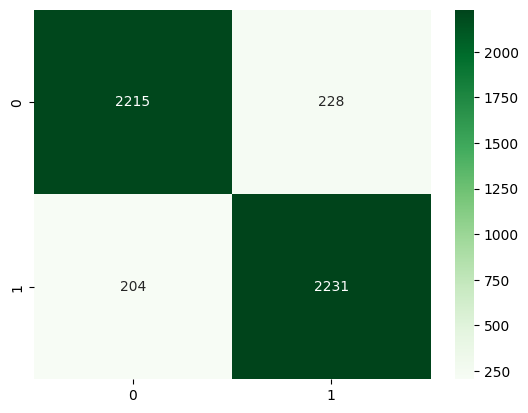

In [62]:
model_evaluation(rf_new)

In [63]:
pickle.dump(rf_new,open('model.pkl','wb'))

In [64]:
pred = rf_new.predict(X_val)

In [65]:
pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [66]:
pd.DataFrame({'Original': y_val, 'Predicted': pred})

,Original,Predicted
23419,1,1
23480,1,1
6115,0,0
21894,1,1
24140,1,1
...,...,...
16581,0,0
7582,0,0
2327,0,0
19137,1,1
